# Atividade 2.2 - Linear regression, p-value and metrics

**Curso:** Bacharelado em Ciência da Computação  
**Disciplina:** Matemática Computacional  
**Professor:** Claudomiro de Souza de Sales Junior
**Aluno:** Alessandro Reali Lopes Silva

---

## Esse Nootebook tem como objetivo apresentar a resolução da Atividade 2.2 - Linear regression, p-value and metrics
1. Correlação e Regressão Linear
2. Intervalo de Confiança
3. Teste de Hipótese (p-value)
4. Nível de Significância
5. Reprodução de Slides
6. Regressão e R-Squared
7. Fatoração LU
8. Método de Gauss-Jacobi
9. Método de Gauss-Seidel

In [152]:
import numpy as np
from IPython.display import display, Markdown
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import seaborn as sns
from scipy.stats import sem, t


# Configuração estética dos gráficos
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = [10, 5]

### 1. Correlação e Regressão Linear

Nesta seção, exploramos o conceito de **Regressão Linear Simples**, que busca modelar a relação entre duas variáveis através de uma equação linear da forma:

$$y = ax + b + \epsilon$$

Onde:
* $a$ (slope): Coeficiente angular (inclinação).
* $b$ (intercept): Coeficiente linear (onde corta o eixo Y).
* $\epsilon$: Erro residual.

Analisaremos também:
1.  **Coeficiente de Correlação (r):** Mede a força e direção da relação linear.
2.  **P-value:** Testa a hipótese nula de que a inclinação é zero (sem relação).
3.  **Covariância:** Indica como as variáveis variam juntas.

In [153]:
def analisar_regressao_linear(x, y, titulo):
    """
    Realiza a regressão linear, calcula métricas e plota o gráfico.
    """
    # 1. Cálculo da Regressão Linear usando scipy
    # c_angular = inclinação (a), c_linear = c_linearo (b)
    # c_correlacao = coeficiente de correlação, p_value = teste de hipótese
    c_angular, c_linear, c_correlacao, p_value, erro_padrao = stats.linregress(x, y)
    
    # 2. Cálculo da Covariância
    # A função np.cov retorna uma matriz. [0,1] é a covariância entre x e y.
    matriz_cov = np.cov(x, y)
    covariancia = matriz_cov[0, 1]
    
    # 3. Criação da Reta de Regressão para o gráfico
    reta = c_angular * x + c_linear
    
    # 4. Plotagem
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, label='Dados Observados', alpha=0.7, color='blue')
    plt.plot(x, reta, color='red', label=f'Reta: y={c_angular:.2f}x + {c_linear:.2f}')
    
    plt.title(f"{titulo}\nR²: {c_correlacao**2:.4f} | p-value: {p_value:.4e} | Cov: {covariancia:.4f}")
    plt.xlabel('Variável Independente (X)')
    plt.ylabel('Variável Dependente (Y)')
    plt.legend()
    plt.show()
    

    conclusao = "Existe relação estatisticamente significativa. Rejeita-se a hipótese nula." if p_value < 0.05 else "Não há evidência forte de relação linear."

    # 5. Exibição dos Dados Estatísticos
    display(Markdown(f"""### Estatísticas para: {titulo}
- **Equação da Reta:** y = {c_angular:.4f}x + {c_linear:.4f}
- **Coeficiente de Correlação (r):** {c_correlacao:.4f}
- **Coeficiente de Determinação (R²):** {c_correlacao**2:.4f}
- **P-value:** {p_value:.4e}
- **Covariância:** {covariancia:.4f}
- **Erro Padrão da Estimativa:** {erro_padrao:.4f}
- **Conclusão:** {conclusao}
"""))

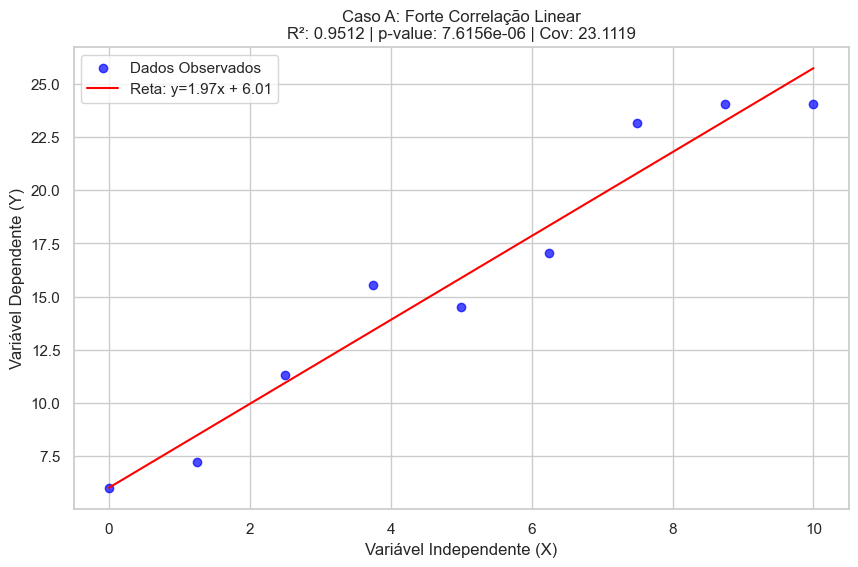

### Estatísticas para: Caso A: Forte Correlação Linear
- **Equação da Reta:** y = 1.9722x + 6.0140
- **Coeficiente de Correlação (r):** 0.9753
- **Coeficiente de Determinação (R²):** 0.9512
- **P-value:** 7.6156e-06
- **Covariância:** 23.1119
- **Erro Padrão da Estimativa:** 0.1688
- **Conclusão:** Existe relação estatisticamente significativa. Rejeita-se a hipótese nula.


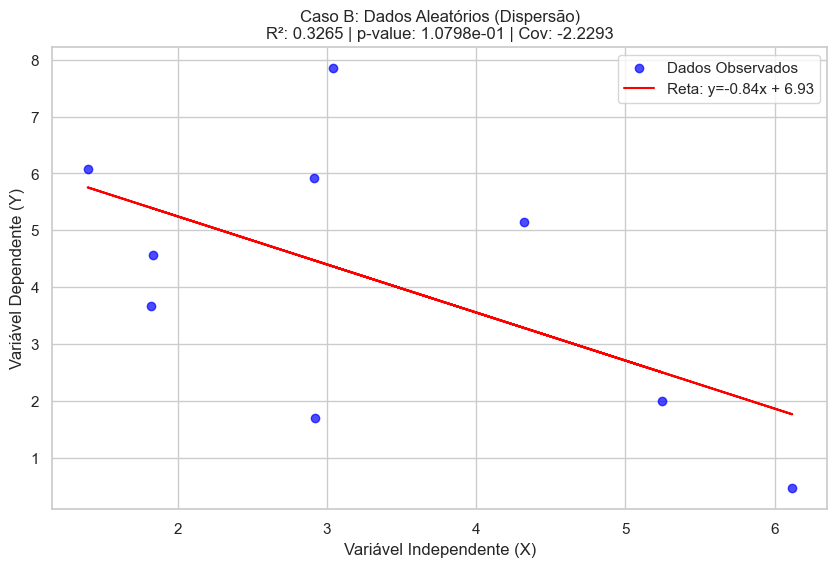

### Estatísticas para: Caso B: Dados Aleatórios (Dispersão)
- **Equação da Reta:** y = -0.8449x + 6.9334
- **Coeficiente de Correlação (r):** -0.5714
- **Coeficiente de Determinação (R²):** 0.3265
- **P-value:** 1.0798e-01
- **Covariância:** -2.2293
- **Erro Padrão da Estimativa:** 0.4586
- **Conclusão:** Não há evidência forte de relação linear.


In [154]:
QNT_PONTOS = 9  # Número de pontos a serem gerados
RANDOM = False  # Define se os dados serão aleatórios ou pseudoaleatórios
C_ANGULAR = 2   # Coeficiente angular da reta geradora dos dados sintéticos
C_LINEAR = 5    # Coeficiente linear da reta geradora dos dados sintéticos

if RANDOM:
    np.random.seed(None)
else:
    np.random.seed(42)

# --- GERANDO OS DADOS PARA O TESTE ---

# Caso 1: Dados com forte correlação linear (Sintéticos)
x_linear = np.linspace(0, 10, QNT_PONTOS)
ruido = np.random.normal(0, 2, QNT_PONTOS)
y_linear = C_ANGULAR * x_linear + C_LINEAR + ruido

# Caso 2: Dados Aleatórios (Sem correlação)
x_random = np.random.rand(QNT_PONTOS) * 10
y_random = np.random.rand(QNT_PONTOS) * 10

# --- EXECUTANDO A ANÁLISE ---
analisar_regressao_linear(x_linear, y_linear, "Caso A: Forte Correlação Linear")
analisar_regressao_linear(x_random, y_random, "Caso B: Dados Aleatórios (Dispersão)")

### 2. Intervalo de Confiança

Nesta seção, abordamos o item **B** da atividade. O objetivo é calcular e visualizar o **Intervalo de Confiança (IC)** para a média de um conjunto de dados.

O **Intervalo de Confiança** é uma estimativa de faixa que tem uma alta probabilidade (geralmente 95%) de conter o verdadeiro parâmetro da população (neste caso, a média real $\mu$), calculado a partir de estatísticas da amostra.

A fórmula geral para o cálculo do IC (usando a distribuição *t-Student*, ideal para amostras onde não conhecemos o desvio padrão da população) é:

$$IC = \bar{x} \pm t \cdot \frac{s}{\sqrt{n}}$$

Onde:
- **$\bar{x}$:** Média amostral.
- ***t*:** Valor crítico da distribuição *t-Student* (depende do nível de confiança e dos graus de liberdade).
- ***s*:** Desvio padrão amostral.
- ***n*:** Tamanho da amostra.
- **$\frac{s}{\sqrt{n}}$:** Erro Padrão da Média (Standard Error of the Mean - SEM).

Vamos analisar como a largura do intervalo muda conforme alteramos o **Nível de Confiança** (90%, 95%, 99%).

In [155]:
def obter_dados_amostrais(tamanho, media_real, desvio_real, random_seed):
    """
    Simula a obtenção de um conjunto de dados amostrais (ex: alturas em metros).
    Pode ser substituída por uma função que lê um arquivo ou recebe uma lista manual.
    """
    if random_seed is not None:
        np.random.seed(random_seed)
    else:
        np.random.seed(None)
        
    # Gera dados seguindo uma distribuição normal (simulando uma população real)
    dados = np.random.normal(loc=media_real, scale=desvio_real, size=tamanho)
    return dados

def analisar_intervalo_confianca(dados, niveis_confianca):
    """
    Calcula estatísticas descritivas e intervalos de confiança para diferentes níveis,
    plotando os resultados visualmente.
    """
    # 1. Estatísticas Básicas
    n = len(dados)
    media = np.mean(dados)
    desvio_padrao = np.std(dados, ddof=1) # ddof=1 para desvio amostral
    erro_padrao = sem(dados) # Standard Error of the Mean (s / sqrt(n))
    
    # 2. Relatório Inicial
    display(Markdown(f"""### Análise Estatística da Amostra
- **Tamanho da Amostra (n):** {n}
- **Média Amostral ($\\bar{{x}}$):** {media:.4f}
- **Desvio Padrão (*s*):** {desvio_padrao:.4f}
- **Erro Padrão (SEM):** {erro_padrao:.4f}
"""))
    
    # 3. Cálculo dos Intervalos
    intervalos_plot = []
    margens_erro = []
    textos_resultado = "### Resultados dos Intervalos:\n"
    
    for confianca in niveis_confianca:
        # t.interval retorna (limite_inferior, limite_superior)
        # df = graus de liberdade (n - 1)
        lim_inf, lim_sup = t.interval(confianca, df=n-1, loc=media, scale=erro_padrao)
        
        margem = lim_sup - media
        margens_erro.append(margem)
        intervalos_plot.append((lim_inf, lim_sup))
        
        textos_resultado += f"- **IC {confianca*100:.0f}%:** [{lim_inf:.5f}, {lim_sup:.5f}] (Margem: $\\pm$ {margem:.4f})\n"
    
    display(Markdown(textos_resultado))
    
    # 4. Plotagem Gráfica
    plt.figure(figsize=(8, 5))
    
    # Plota a média como uma linha vertical pontilhada
    plt.axvline(media, color='black', linestyle='--', label=f'Média: {media:.2f}', alpha=0.6)
    
    # Eixo Y apenas para separar os níveis (0, 1, 2...)
    y_pos = np.arange(len(niveis_confianca))
    # Lista de X com o mesmo tamanho de Y, repetindo a média
    x_pos = [media] * len(niveis_confianca)
    
    # Plota as barras de erro
    # x = media (ponto central), xerr = margem (tamanho do braço)
    plt.errorbar(
        x=x_pos,
        y=y_pos,
        xerr=margens_erro,
        fmt='o',
        color='red',
        capsize=6,
        elinewidth=2,
        markeredgewidth=2,
        label='Intervalo de Confiança'
    )
    
    # Estética do Gráfico
    plt.yticks(y_pos, [f"{c*100:.0f}%" for c in niveis_confianca])
    plt.ylabel('Nível de Confiança')
    plt.xlabel('Valores da Amostra')
    plt.title(f'Intervalos de Confiança (n={n})')
    plt.legend()
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    
    # Adiciona os valores nas pontas das barras para facilitar leitura
    for i, margem in enumerate(margens_erro):
        plt.text(media + margem, i + 0.1, f"{media+margem:.5f}", va='center', fontsize=9, color='blue')
        plt.text(media - margem, i + 0.1, f"{media-margem:.5f}", va='center', fontsize=9, color='blue')

    margem = max(margens_erro) * 1.3

    plt.xlim(media - margem, media + margem)
    plt.ylim(-1, len(niveis_confianca))

    plt.show()

### Análise Estatística da Amostra
- **Tamanho da Amostra (n):** 30
- **Média Amostral ($\bar{x}$):** 1.7312
- **Desvio Padrão (*s*):** 0.0900
- **Erro Padrão (SEM):** 0.0164


### Resultados dos Intervalos:
- **IC 90%:** [1.70327, 1.75911] (Margem: $\pm$ 0.0279)
- **IC 95%:** [1.69758, 1.76479] (Margem: $\pm$ 0.0336)
- **IC 99%:** [1.68589, 1.77648] (Margem: $\pm$ 0.0453)
- **IC 93%:** [1.70027, 1.76210] (Margem: $\pm$ 0.0309)
- **IC 80%:** [1.70964, 1.75273] (Margem: $\pm$ 0.0215)


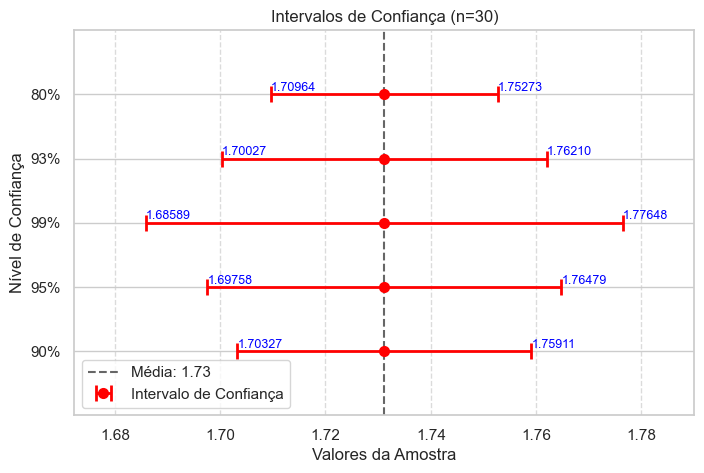

In [156]:
# Níveis de confiança exigidos pelo slide (geralmente 90, 95 e 99)
NIVEIS_CONFIANCA = [0.90, 0.95, 0.99, 0.93, 0.80]
RANDOM = True  # Define se os dados serão aleatórios ou pseudoaleatórios
SEED = 42

dados_amostra = [1.75,2.00,1.80,1.65,1.70,1.90,1.85,1.60,1.78,1.72,1.88,1.76,1.95,1.68,1.82,1.74,1.79,1.83,1.67,1.71,1.77,1.81,1.69,1.73,1.84,1.66,1.87,1.92,1.94,1.93,1.86]  # Dados manuais fornecidos

if RANDOM:
    # Geramos dados seguindo uma distribuição normal
    dados_amostra = obter_dados_amostrais(
        tamanho=30,
        media_real=1.75,
        desvio_real=0.10,
        random_seed=SEED
    )

# --- EXECUTANDO A ANÁLISE ---
analisar_intervalo_confianca(dados_amostra, NIVEIS_CONFIANCA)